<a href="https://colab.research.google.com/github/AnyaAP/ComputerGraphics/blob/main/Filling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-37-b06e7c09c992>:18: RuntimeWarning: divide by zero encountered in long_scalars
  x[1] =  (point[(j+1)%point_count][0]-point[j][0])/(point[(j+1)%point_count][1]-point[j][1]) # приращение х


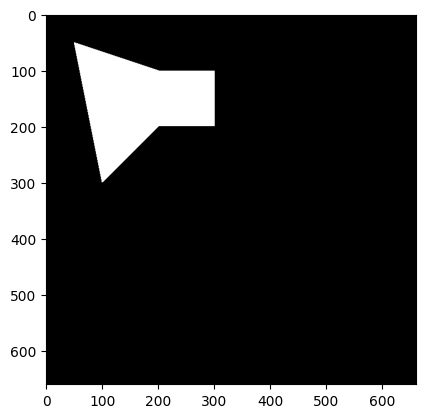

In [37]:
import numpy as np
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import matplotlib.pyplot as plt

array = np.ndarray((660, 660, 3), np.uint8)
array[:, :, 0] = 0
array[:, :, 1] = 0
array[:, :, 2] = 0

def creat_Net(point, row, y_min,y_max ):
  Net =  [([ ] * y_max ) for i in range(y_max )]
  point_count = point.shape[0]
  for j in range(0,  point_count):
    x = np.zeros(10)
    first = int(min(point[(j+1)%point_count][1] , point[j][1]))
    x[1] =  (point[(j+1)%point_count][0]-point[j][0])/(point[(j+1)%point_count][1]-point[j][1]) # приращение х
    x[2] = max(point[(j+1)%point_count][1] , point[j][1])
    if(point[(j+1)%point_count][1] < point[j][1]):
      x[0] = point[(j+1)%point_count][0]
    else:
      x[0] = point[j][0]
    Net[first].append(x)
  return Net

def draw_line(i,x ,y ):
  for j in range(int(x),int(y)+1):
    array[i,j]=(255,255,255)


def polygon_fill(point):
  y_min = np.min(point[:,1])
  y_max = np.max(point[:,1])
  Net = creat_Net(point, y_max - y_min + 1, y_min, y_max)
  x_sort = [] * 3
  for i in range(y_min, y_max):
    x = Net[i]
    if(len(x) != 0):
      for k in x :
        x_sort.append(k)
    x_image = [] * 3
    for cell in x_sort:
      x_image.append(cell[0])
    x_image.sort()
    if(len(x_image) >= 3 and x_image[0]==x_image[1] and x_image[2]>x_image[1]):
      x_image[1] = x_image[2]
    draw_line(i, x_image[0], x_image[1])

    linshi = [] * 3
    for cell in x_sort:
      if cell[2] > i:
        cell[0] += cell[1]
        linshi.append(cell)
    x_sort = linshi[:]

  x_image = [] * 3
  for cell in x_sort:
    x_image.append(cell[0])
  x_image.sort()

  draw_line(i, x_image[0],x_image[1])


point =  [[50,50], [200,100], [300,100],[300,300], [200,200], [100,300]]
point = np.array(point)
polygon_fill( point )
image = Image.fromarray(array)
plt.imshow(image)
